<a href="https://colab.research.google.com/github/vivek-a81/EVA6/blob/main/Session10/Assignment%20B/Assignment_10_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# from google.colab import drive
# drive.mount('/gdrive')

In [3]:
data_file = "/gdrive/MyDrive/EVA6/Session10/COCODataset.xlsx"

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
df = pd.read_excel(data_file)
X = df.iloc[:, [-2, -1]]

# Show the class distribution

In [6]:
unique, counts = np.unique(df.iloc[:,0], return_counts=True)

Text(0, 0.5, 'Frequency')

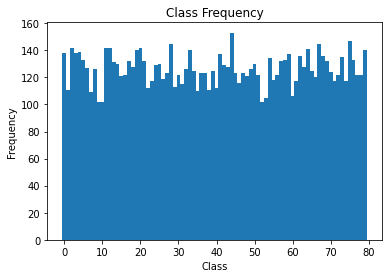

In [7]:
plt.bar(unique, counts, 1 )
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')

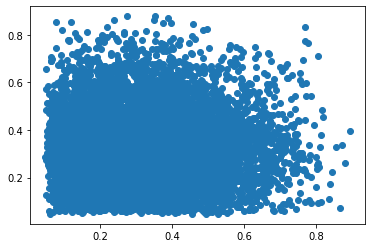

In [8]:
plt.scatter(X.iloc[:,0], X.iloc[:,1])

In [9]:
from matplotlib.patches import Rectangle

Anchor Boxes
[[0.21800972 0.23937561]
 [0.47820696 0.2747049 ]
 [0.2933176  0.49000069]]
Anchor Boxes
[[0.48097647 0.27242493]
 [0.20521151 0.38892595]
 [0.24723699 0.18160679]
 [0.38518916 0.53279805]]
Anchor Boxes
[[0.36883626 0.5272217 ]
 [0.19582219 0.40128108]
 [0.38192967 0.23798785]
 [0.18887418 0.18646305]
 [0.58138919 0.31869355]]
Anchor Boxes
[[0.58712627 0.34423629]
 [0.17028642 0.40289598]
 [0.1904382  0.19244854]
 [0.40450918 0.17267584]
 [0.35578995 0.35962054]
 [0.3359177  0.59183155]]


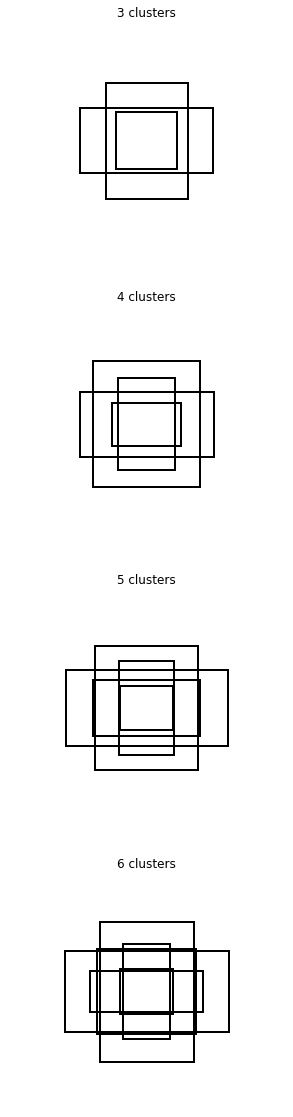

In [14]:
wcss = []
fig, axes = plt.subplots(4,1,figsize= (5, 20))
idx = 0
for n_clusters in range(3, 7):

    ax = axes[idx]
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(X)
    print("Anchor Boxes")
    print(kmeans.cluster_centers_)
    anchors_ = kmeans.cluster_centers_
    # anchors = sorted(anchors_, key=lambda x: x[0]*x[1])
    # print(anchors)
    anchors = anchors_
    ax.set_title('{} clusters'.format(n_clusters))
    ax.axis('off')
    for i in range(0, n_clusters):
        # ax.add_patch(Rectangle((0, 0), anchors[i,0], anchors[i,1],color=plt.cm.RdYlBu(i*40)))
        ax.add_patch(Rectangle((-1*anchors[i][0]/2 + 0.5, -1*anchors[i][1]/2 + 0.5), anchors[i][0], anchors[i][1], fill=False, linewidth=2))
    idx = idx + 1
plt.show()